### 1. Data Issues:
#### - Direct Observation:
#### - Analytical Observation:

### 2. Preprocessing
#### - Inference on data entries, types and corrections procedures:

### 3. Visualization

### 4. Other things we could do...

In [575]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Use Pandas to read in the CSV data here.
census_data = pd.read_csv('census_07_2022.csv')

The very first thing I did was observe the column headers of my dataset for comprehension of what my data actually contains. This step is also to gain some possible insights on reasonable (or sensible) types of data that should be intended and how well they have been represented, as well as to check if there are first-sight correlation possibilities.

In [576]:
census_data.columns

Index(['Unnamed: 0', 'House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

It is important to observe and scrutinize the dataset to ensure they are usable by taking a peep into the data using the .head() function.

In [577]:
census_data.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Forgotten Gardens,Laura,White,56,Head,Married,Female,Unemployed,None,Christian
1,1,1,Forgotten Gardens,Elliot,White,57,Husband,Married,Male,"Education officer, community",None,Christian
2,2,1,Forgotten Gardens,Nicole,White,15,Daughter,NaN,Female,Student,None,NaN
3,3,2,Forgotten Gardens,Michelle,John,44,Head,Divorced,Female,"Administrator, arts",None,Christian
4,4,2,Forgotten Gardens,Jeffrey,John,9,Son,NaN,Male,Student,None,NaN


# Data Issues:

#### Direct Observation:
Census data obviously has error data at third and fifth records (Married and Religion columns) just from observing the first five records. This is also seen when dataframe is enlisted by converting the dataframe to a list.

#### Analytical Observation:
Also, taking a preliminary overview of the overall data and extending the error-data finding process to all columns in the dataset using the .describe() method reveals a lot of data issues. For instance, Marital Status and the Religion columns show count deficiencies compared to the others. About 2000 entries relatively had issues in each cases.

In [578]:
census_data.describe(include='all')

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
count,7773.000000,7773,7773,7773,7773,7773,7773,5960,7773,7773,7773,5910
unique,NaN,222,105,366,630,110,21,9,9,1086,8,14
top,NaN,1,Wong Light,James,Smith,43,Head,Single,Female,Student,None,None
freq,NaN,301,701,36,225,146,2912,2660,3889,1477,7721,2594
mean,3886.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2244.016154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1943.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3886.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5829.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observing the overall statistics computed from the .describe function, it is therefore confirmed that there are a handful of error data that are preventing the algorithms from evaluating preliminary analysis such as finding proper values for mean, standard deviation, percentile, etc. We will need to get closer to the data to find all possible issues.

The .isnull(), .unique() and the .isspace() functions are used extensively to reveal problematic data column by column. Problematic data includes empty data, spaces and other irrelevant data such as NaN.

 I did this by looping through the data to get:
 1. isnull status of each column, 
 2. isspace status of each column, 
 3. unique values of each column values and
 4. displayed the index of all problematic data.

For the complete observation of data values and types.

In [579]:
import math

column_serial_number = 1

# Loop over columns:    
for column in  census_data.columns:
    
    # preparing a placeholder for problematic data and their indices:
    problematic_data_and_coordinates = {}
    
    # let us hope there is no space value in the current column
    is_space_status_of_current_column = False
    
    # initialize the record index to identify the coordinates of the problematic data.
    record_index = 0
    
    # looping through each values in the column to find problematic data.
    for record_value in census_data[column]:
        
        old_problematic_data = []
        # is there space value in column?
        if str(record_value).isspace():
            
            # notify of each existence of problematic data:            
            # Oh yes! Space data exists in the column!
            is_space_status_of_current_column = True
            
            # retrieve already stored problematic data and append to it, but group problem by type
            # (whitespace or empty):
            
            # Have we stored any space data previously? If we have, let's retrieve it
            # and append new ones. We store only the record index as the coordinates.
            # We can easily combine this with the column names to find (or even replace)
            # the data anytime.
            
            if 'space_data_index' in problematic_data_and_coordinates:
                old_problematic_data = problematic_data_and_coordinates['space_data_index']
                old_problematic_data.append(record_index)
                problematic_data_and_coordinates.update({'space_data_index': old_problematic_data})
                
            # If we haven't recorded any space data problem in the past, we begin:
            else:
                problematic_data_and_coordinates.update({'space_data_index': [record_index]})
                
        # if on the other hand, the data is not space but rather empty or irrelevant, 
        # change the problematic group name to null_data_index. 
        # Well, it might make sense that space isn't the same as empty!
        if len(str(record_value)) < 1 or record_value == None or \
            (type(record_value) == float and math.isnan(record_value)):
            if 'null_data_index' in problematic_data_and_coordinates:
                old_problematic_data = problematic_data_and_coordinates['null_data_index']
                old_problematic_data.append(record_index)
                problematic_data_and_coordinates.update({'null_data_index': old_problematic_data})
                
            # If we haven't recorded any empty data problem in the past, we begin:
            else:
                problematic_data_and_coordinates.update({'null_data_index': [record_index]})
                
            
        record_index += 1
    
    # Display! Display!! Display!!!
    
    # print the results in the current column except the irrelevant unnamed column.
    if column == census_data.columns[0]:
        continue
    else:
        # checking if current column contains empty values
        print(column_serial_number, '.', '  ', column)
        print('------------------------------------')
        print()
        print('isNull and isEmpty data status is', census_data[column].isnull().values.any())
        print()
        # display if there is/are space data in the current column
        print('isspace data status:', is_space_status_of_current_column)
        print()
        # Coordinates of the problematic data in the current column
        print('Problematic data indexes', problematic_data_and_coordinates)
        print()
        # Unique entries are sorted as string to make problematic data more visible
        unique_values_array = census_data[column].unique()
        unique_values_array = [str(i) for i in unique_values_array]
        unique_values_array.sort()
        print(column, 'unique data are:', unique_values_array)
        print()
        print()
        print()
        print()
        print()
    column_serial_number += 1

1 .    House Number
------------------------------------

isNull and isEmpty data status is False

isspace data status: False

Problematic data indexes {}

House Number unique data are: ['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '2

7 .    Marital Status
------------------------------------

isNull and isEmpty data status is True

isspace data status: True

Problematic data indexes {'null_data_index': [2, 4, 7, 8, 9, 12, 22, 23, 25, 26, 27, 32, 33, 34, 41, 42, 43, 52, 53, 54, 70, 78, 79, 80, 81, 83, 84, 100, 101, 108, 109, 128, 141, 144, 145, 146, 149, 151, 152, 156, 157, 159, 160, 161, 164, 165, 167, 172, 181, 182, 183, 184, 185, 200, 201, 202, 205, 206, 209, 210, 213, 214, 215, 217, 222, 231, 232, 237, 239, 240, 241, 245, 246, 247, 251, 252, 258, 262, 263, 271, 275, 282, 290, 291, 292, 300, 301, 302, 305, 312, 315, 316, 319, 323, 324, 330, 332, 333, 334, 337, 346, 355, 356, 357, 360, 361, 364, 365, 372, 376, 379, 380, 381, 384, 385, 398, 399, 400, 404, 406, 407, 408, 413, 416, 417, 424, 426, 427, 428, 433, 436, 438, 439, 440, 445, 448, 449, 460, 462, 463, 464, 465, 467, 468, 469, 470, 488, 499, 500, 505, 507, 508, 519, 541, 551, 552, 553, 554, 557, 559, 560, 562, 590, 595, 596, 598, 615, 619, 626, 627, 628, 631,

Problematic data indexes {'null_data_index': [2, 4, 7, 8, 9, 12, 22, 23, 25, 26, 27, 32, 33, 34, 41, 42, 43, 52, 53, 54, 70, 78, 79, 80, 81, 83, 84, 100, 101, 108, 109, 128, 141, 144, 145, 146, 149, 151, 152, 156, 157, 159, 160, 161, 164, 165, 167, 172, 181, 182, 183, 184, 185, 193, 200, 201, 202, 205, 206, 209, 210, 213, 214, 215, 217, 222, 231, 232, 237, 239, 240, 241, 245, 246, 247, 251, 252, 258, 262, 263, 271, 275, 282, 290, 291, 292, 300, 301, 302, 305, 312, 315, 316, 319, 323, 324, 330, 332, 333, 334, 337, 346, 355, 356, 357, 360, 361, 364, 365, 372, 376, 379, 380, 381, 384, 385, 398, 399, 400, 404, 406, 407, 408, 413, 416, 417, 424, 426, 427, 428, 433, 436, 438, 439, 440, 445, 448, 449, 460, 462, 463, 464, 465, 467, 468, 469, 470, 488, 499, 500, 505, 507, 508, 519, 541, 551, 552, 553, 554, 557, 559, 560, 562, 565, 590, 595, 596, 598, 615, 619, 626, 627, 628, 631, 638, 645, 647, 657, 658, 667, 668, 669, 693, 696, 700, 712, 713, 717, 721, 727, 728, 730, 731, 732, 733, 734, 740, 7

A test to prove the results are correct for any selected column.

In [580]:
infirmity_problematic = [430, 509, 2012, 2818, 6208, 6642]
vals = [census_data['Infirmity'][i] for i in infirmity_problematic]
vals


[' ', ' ', ' ', ' ', ' ', ' ']

#### Inference on data entries, types and corrections procedures:
From analytical observation of data, I inferred that:
1. House Number variable has only one inconsistent issue by including a spelt 'One' value rather than using a figure. It's type is insignificant. I corrected this misplelling below.

In [581]:
index = census_data[census_data['House Number'] == 'One'].index.values
census_data.at[index[0], 'House Number'] = 1
print(census_data['House Number'][index[0]])

1


2. Street (name) variable is OK. It's type would be retained as string alongside variables as First Name, Surname, Relationship with house head, Marital Status, Gender, Occupation, Infirmity and Religion.

3. First Name variable has 2 missing values. It does not matter what was there. Therefore, replacing with reference names would be okay. I have replaced with letters unknown 1 and unknown 2 respectively.

In [582]:
census_data.loc[census_data['First Name'] == \
               census_data['First Name'][267]]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
267,267,51,Fish Harbor,,Armstrong,55,None,Single,Male,Unemployed,None,Catholic
6421,6421,19,Wilkins Street,,Clarke,69,Head,Single,Male,Retired Community development worker,None,Christian


However, comparing other variables such as surname, street name and house number show that there was no duplicate, only omission.

In [583]:
census_data.loc[(census_data['Surname'] == census_data['Surname'][267]) & \
                (census_data['Street'] == census_data['Street'][267]) & \
                (census_data['House Number'] == census_data['House Number'][267])]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
267,267,51,Fish Harbor,,Armstrong,55,None,Single,Male,Unemployed,None,Catholic


In [584]:
census_data.loc[(census_data['Surname'] == census_data['Surname'][6421]) & \
                (census_data['Street'] == census_data['Street'][6421]) & \
                (census_data['House Number'] == census_data['House Number'][6421])]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6421,6421,19,Wilkins Street,,Clarke,69,Head,Single,Male,Retired Community development worker,None,Christian


In [585]:
First_Name_Problematic = [267, 6421]
name1 = census_data['First Name'][First_Name_Problematic[0]]
name2 = census_data['First Name'][First_Name_Problematic[1]]

if name1.isspace() and name2.isspace():
    census_data.at[First_Name_Problematic[0], 'First Name'] = 'unknown'
    census_data.at[First_Name_Problematic[1], 'First Name'] = 'unknown'

print(census_data['First Name'][First_Name_Problematic[0]], census_data['First Name'][First_Name_Problematic[1]])


unknown unknown


4. The surname variable is OK as is. No issue.

5. The Age and the Relationship with the house head variables have 1 missing values each. None is a value option for the Relationship variable. However, considering name, age, marital status, gender, occupation, infirmity variables, gave a better suggestion for the individual as shown below. The the case of the age, zero was used to identify unknown.

In [586]:
census_data.loc[census_data['Age'] == \
               census_data['Age'][5998]]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5998,5998,40,Skylock Curve,Jodie,Clarke,,Daughter,NaN,Female,Child,None,NaN


In [587]:
census_data.at[5998, 'Age'] = 10
census_data['Age'][5998]

10

In [588]:
census_data.loc[census_data['Relationship to Head of House'] == \
               census_data['Relationship to Head of House'][2240]]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2240,2240,19,Norwich Cliffs,Emily,Hill,19,,Single,Female,University Student,None,None


There was one entry whose age value was too low to be real (7.11E-15). However, considering other factors like marital status, I was able to make a fair adjustment.
The were also records of decimals, which I convert to an integer.

The Age variable would be converted to the integer type.

In [589]:
#74.38784457, 7.11E-15, 77.57582061, 80.57582061
census_data.loc[(census_data['Age'] == '74.38784457') | \
               (census_data['Age'] == '7.11E-15') | \
               (census_data['Age'] == '77.57582061') | \
               (census_data['Age'] == '80.57582061')]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
359,359,80,Fish Harbor,Alex,Ward,74.38784457,Husband,Married,Male,Unemployed,None,Christian
5060,5060,5,Kerr Avenue,Lewis,Turner,80.57582061,Head,Married,Male,Retired Haematologist,None,Christian
5061,5061,5,Kerr Avenue,Kirsty,Turner,77.57582061,Wife,Married,Female,Retired Theme park manager,None,None
5062,5062,5,Kerr Avenue,Jodie,Dixon,7.11E-15,Granddaughter,NaN,Female,Child,None,NaN


Result shows that of them are member of the same household who mistakingly appended decimals to their real ages. The ages were stripped below of all appendages.

In [590]:
age_decimal_values = ['74.38784457', '72.38784457', '7.11E-15', '77.57582061', '80.57582061']

indexes = [census_data[census_data['Age'] == i].index.values[0] for i in age_decimal_values]
print(indexes)


for i in indexes:    
    census_data.at[[i], 'Age'] = census_data['Age'][i].split('.')[0]
    print(census_data['Age'][i])


[359, 358, 5062, 5061, 5060]
74
72
7
77
80


### Other corrections made:
6. Marital Status has 1 missing value value and thousands of unusable (NaN) data values.  This is the same with Religion. Also, comparing the Age and the gender variables could make a fair suggestion.
In this case, I gave a 25 years threshold for female and 30 years threshold for male. Females that are 25 years and males, 30 years and beyond were tagged as married were status was irrelevant. On the other hand the 'mode' religion were used to clean missing or irrelevant religion data.

In [591]:
#819
census_data.loc[census_data['Marital Status'] == \
               census_data['Marital Status'][819]]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
819,819,31,Newfound Drive,Hilary,Morgan,22,Daughter,,Female,University Student,None,None


7. Gender variable has 1 missing value. Comparing other variables suggested something better. Mispelt values were corrected.

In [592]:
#[5394]
census_data.loc[census_data['Gender'] == \
               census_data['Gender'][5394]]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5394,5394,13,Simpson Flats,Antony,Welch-Martin,61,Husband,Married,,"Psychologist, prison and probation services",None,Catholic


In [593]:
census_data.at[5394, 'Gender'] = 'Male'
print(census_data['Gender'][5394])

Male


8. Occupation has 1 missing value. 1 missing value was Ok. However, a 70 year old woman would better have retired rather than a 'None' option, which takes her out of consideration for a job planning into the aging planning.

In [594]:
#949
census_data.loc[census_data['Occupation'] == \
               census_data['Occupation'][949]]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
949,949,16,Newfound Creek,Danielle,Wood,70,Head,Single,Female,,None,Christian


In [670]:
census_data.at[949, 'Occupation'] = 'Retired'
print(census_data['Occupation'][949])

Retired


9. Infirmity has a couple of missing values which was OK. The 'None' option was used instead.

In [595]:
age_decimal_values = [430, 509, 2012, 2818, 6208, 6642]
census_data.loc[(census_data['Infirmity'] == census_data['Infirmity'][430]) | \
               (census_data['Infirmity'] == census_data['Infirmity'][509]) | \
               (census_data['Infirmity'] == census_data['Infirmity'][2012]) | \
                (census_data['Infirmity'] == census_data['Infirmity'][6208]) | \
                (census_data['Infirmity'] == census_data['Infirmity'][6642]) | \
               (census_data['Infirmity'] == census_data['Infirmity'][2818])]

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
430,430,1,Matthews River,Lawrence,Parker,45,Husband,Married,Male,Lawyer,,Methodist
509,509,23,Butcher Burgs,Ian,Jones,72,Head,Single,Male,Retired Systems analyst,,Christian
2012,2012,32,Wakefieldthorpe Street,William,Brown,55,Head,Married,Male,Print production planner,,Christian
2818,2818,2,Aquarius Lane,Vincent,Greenwood,28,Son,Single,Male,Therapeutic radiographer,,Christian
6208,6208,4,Sullivan Ridges,Alice,Cook,15,Daughter,NaN,Female,Student,,NaN
6642,6642,21,Iqbal Plaza,Adrian,Brown,60,Head,Single,Male,Maintenance engineer,,Christian


### Religion

Religion has countless number of NaN entries.
Number of unique responses are shown below.

Number of total records 7773
Number of data entry 5910
Number of unique responses 15



        index  Frequency
0        None   0.333719
1     Unknown   0.239676
2   Christian   0.233243
3    Catholic   0.103564
4   Methodist   0.063167
5      Muslim   0.012865
6        Sikh   0.007719
7      Jewish   0.004631
8               0.000386
9     Private   0.000257
10      Bahai   0.000257
11    Buddist   0.000129
12    Baptist   0.000129
13  Orthodoxy   0.000129
14       Sith   0.000129


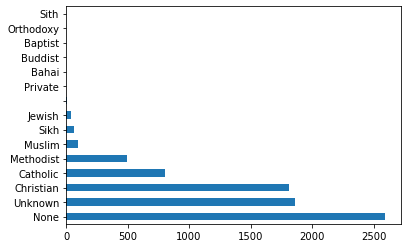

In [596]:
rel = census_data['Religion'].replace(float('nan'), 'Unknown')
rel2 = census_data['Religion'].dropna()
print('Number of total records', len(rel))
print('Number of data entry', len(rel2))
print('Number of unique responses', rel.nunique())
#print('Response=', rel.unique())
#print('No =', list(rel.value_counts()))
print()
print()
print()
#print('Response  |    No')
#print('-------------------')
print(rel.value_counts(normalize=True).to_frame('Frequency').reset_index())
rel.value_counts().plot(kind='barh')

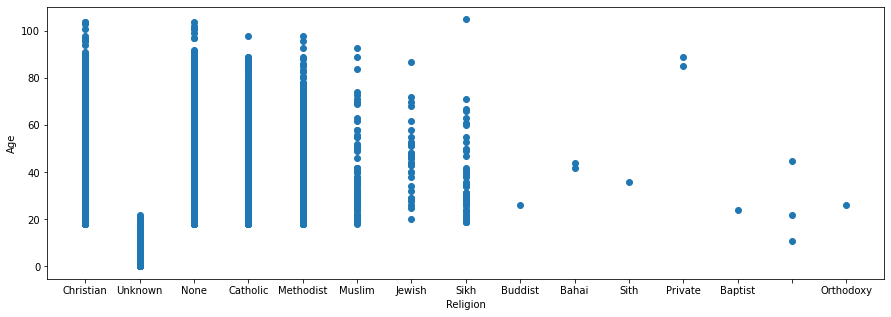

In [597]:
#df.a = df.a.astype(np.int32)
typed_age_data = pd.to_numeric(census_data['Age'])

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
plt.scatter(rel, typed_age_data)
plt.ylabel('Age')
plt.xlabel('Religion')
plt.show()


Min frequency= 1
Max frequency= 829

occu Freq
1     829
2     778
3     540
4     397
5     260
6      59
7      10
10      9
12      7
11      7
8       5
9       3
15      2
18      2
14      1
16      1
20      1
22      1
Name: Occupancy Density, dtype: int64


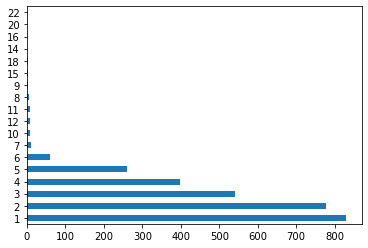

In [831]:
#print(census_data.columns)
grouped_census = census_data.groupby(['Street', 'House Number'])['House Number'].count()#.reset_index()#['Religion'].count()#.plot(kind='scatter')
df = pd.DataFrame([i for i in grouped_census], columns=['Occupancy Density'])
gc = df['Occupancy Density'].value_counts()
print()
print('Min frequency=',min(gc))
print('Max frequency=', max(gc))
print()
print('occu', 'Freq')
print(gc)
gc.plot(kind='barh')

In [599]:
ms_inconsistencies = ['M', 'D', 'S', 'W']
ms_inconsistencies_rep = ['Married', 'Divorced', 'Single', 'Widowed']


for i in range(len(census_data['Marital Status'])):
    for j in range(len(ms_inconsistencies)):
        if census_data['Marital Status'][i] == ms_inconsistencies[j]:
            census_data.at[[i], 'Marital Status'] = ms_inconsistencies_rep[j]
            print(census_data['Marital Status'][i])


Married
Divorced
Divorced
Single
Divorced
Married
Married
Widowed
Widowed
Divorced
Widowed
Divorced
Widowed
Widowed
Divorced
Divorced


In [600]:
gender_inconsistencies = ['female', 'male', 'M', 'F', 'm', 'f']
gender_inconsistencies_rep = ['Female', 'Male', 'Female', 'Male', 'Female', 'Male',]


for i in range(len(census_data['Gender'])):
    for j in range(len(gender_inconsistencies)):
        if census_data['Gender'][i] == gender_inconsistencies[j]:
            census_data.at[[i], 'Gender'] = gender_inconsistencies_rep[j]
            print(census_data['Gender'][i])


Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Male
Female
Female
Male
Female
Female
Female
Female
Female
Female
Male
Male
Female
Female
Female
Female
Male
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Male
Female
Male
Female
Male
Male
Female
Female
Female
Female
Female
Female
Male
Female
Female
Female
Female
Female
Female
Female
Female
Male
Female
Female
Female
Female
Female
Female
Female
Male
Female
Female
Male
Male
Female
Male
Female
Female
Female
Female
Male
Female
Male
Female
Female
Female
Male
Female
Female
Female
Female
Female
Female
Female
Female
Male
Female
Female
Female
Female
Female
Male
Female
Female
Female
Female
Male
Female
Female
Female
Female
Female
Female
Male
Female
Female
Female
Female
Female
Male
Female
Female
Female
Female
Female
Female
Female
Female
Female
Female
Male
Male
Male
Female
Female
Female
Female
Female
Female
Female
Female
Fe

Number of total records 7773
Number of data entry 5960
Number of unique responses 6



      index  Frequency
0    Single       2661
1   Married       2196
2   Unknown       1813
3  Divorced        702
4   Widowed        400
5                    1


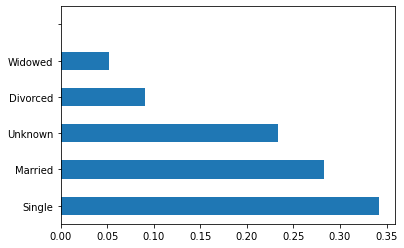

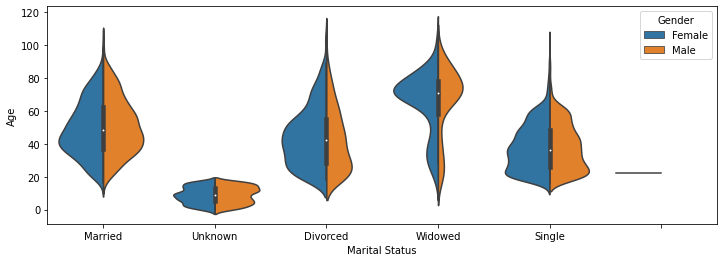

In [601]:
ms = census_data['Marital Status'].replace(float('nan'), 'Unknown')
ms2 = census_data['Marital Status'].dropna()
print('Number of total records', len(ms))
print('Number of data entry', len(ms2))
print('Number of unique responses', ms.nunique())
#print('Response=', rel.unique())
#print('No =', list(rel.value_counts()))
print()
print()
print()
#print('Response  |    No')
#print('-------------------')
print(ms.value_counts().to_frame('Frequency').reset_index())
ms.value_counts(normalize=True).plot(kind='barh')
import seaborn as sns

plt.figure(figsize=(12, 4))
a = sns.violinplot(x= ms, y=typed_age_data, hue=census_data['Gender'], scale="count", split=True)

#### Demographics

7764.0


,Age,Male,Female
0,0-4,-226,205
1,5-9,-249,279
2,10-14,-292,244
3,15-19,-278,288
4,20-24,-265,292
5,25-29,-255,296
6,30-34,-251,302
7,35-39,-277,389
8,40-44,-288,340
9,45-49,-245,330


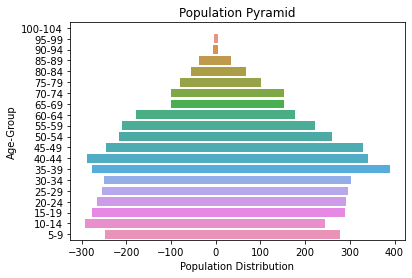

In [743]:
# Function: Copy-pasted from question and modified
# Create DataFrame
def get_num_people_by_age_category(census_data, bins):
    census_data["Age Group"] = pd.cut(x=typed_age_data, bins=bins, right=False)
    return census_data

# Create DataFrame
census_copy = census_data.copy()
bins = [i for i in range(0,105,5)]

# Call function
df = get_num_people_by_age_category(census_copy, bins)
result =census_copy.groupby(['Age Group', 'Gender'])['Age'].count()#count().plot(kind='barh', figsize=(7, 4))
result = [i for i in result]
print(math.fsum(result))
male=[] 
female=[]
for i in range(len(result)):
    if i%2 == 0:
        female.append(result[i])
    else:
        male.append(result[i] * -1)
bins = [str(i)+'-'+str(i+4) for i in range(0,100,5)] 

df =pd.DataFrame({'Age': bins, 'Male': male, 'Female': female}, \
                 columns=['Age', 'Male', 'Female'])
#print(male, female)


bins = [str(i)+'-'+str(i+4) for i in range(100,0,-5)] 
AgeClass = bins# ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

bar_plot = sns.barplot(x='Male', y='Age', data=df, order=AgeClass)

bar_plot = sns.barplot(x='Female', y='Age', data=df, order=AgeClass)

bar_plot.set(xlabel="Population Distribution", ylabel="Age-Group", title = "Population Pyramid")
df

In [ ]:
#b = d.as_integer_ratio()

### Simpler group count
#----------------------
#### 1. Children and Youth
#### 2. Mid-aged
#### 3. Retiring
#### 4. Aging

In [666]:
print(' Male', '  Female')
pd.DataFrame([[df.iloc[0:4, 1].sum()*-1, df.iloc[0:4, 2].sum()],
[df.iloc[5:9, 1].sum()*-1, df.iloc[5:9, 2].sum()],
[df.iloc[11:13, 1].sum()*-1, df.iloc[11:13, 2].sum()],
[df.iloc[14:19, 1].sum()*-1, df.iloc[14:19, 2].sum()]], columns=['Male', 'Female'], \
            index=['Children and Youth', 'Mid-aged', 'Retiring', 'Aging'])

 Male   Female


,Male,Female
Children and Youth,1045,1016
Mid-aged,1071,1327
Retiring,387,401
Aging,282,361


In [682]:
print(0 == True)
-1 +1

False


0

In [667]:
#X_train_data.loc[(X_train_data.Age < 13),  'AgeGroup'] = 'Kid'

#### Occupation analysis

Number of total records 7773
Number of data entry 7773



7773 7773 7773
            Percentage
Employed      0.532227
Student       0.254599
Retired       0.102920
Child         0.055706
Unemployed    0.054548


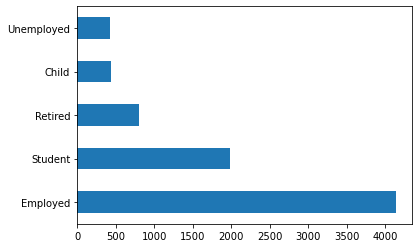

In [729]:
#Occupation analysis (descriptive)
ms = census_data['Occupation'].replace(float('nan'), 'Unknown')
ms2 = census_data['Occupation'].dropna()
print('Number of total records', len(ms))
print('Number of data entry', len(ms2))
#print('Response=', ms.unique())
#print('No =', list(ms.value_counts()))
print()
print()
print()
# Occupation groups
occupation_groups = []
i = 0
for val in census_copy['Occupation']:
    if (val.find('Unemployed') != -1) & (typed_age_data[i] > 60):
        occupation_groups.append('Retired')
    elif (val.find('Child') != -1) & (typed_age_data[i] > 15):
        occupation_groups.append('Unemployed')
    elif val.find('Unemployed') != -1:
        occupation_groups.append('Unemployed')
    elif val.find('Retired') != -1:
        occupation_groups.append('Retired')
    elif val.find('Student') != -1:
        occupation_groups.append('Student')
    elif val.find('Child') != -1:
        occupation_groups.append('Child')
    else:
        occupation_groups.append('Employed')
    i+=1
    
print(len(occupation_groups), len(typed_age_data), len(census_copy))
        
occupation_series = pd.DataFrame(data=occupation_groups)
print(occupation_series[0].value_counts(normalize=True).to_frame('Percentage'))
occupation_series[0].value_counts().plot(kind='barh')

#import seaborn as sns

#plt.figure(figsize=(12, 4))
#a = sns.violinplot(x= ms, y=typed_age_data, hue=census_data['Gender'], scale="count", split=True)

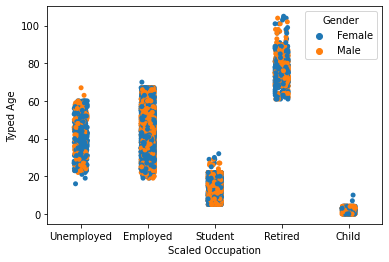

In [742]:
census_copy['Scaled Occupation'] = occupation_groups
census_copy['Typed Age'] = typed_age_data
sns.stripplot(data=census_copy, x="Scaled Occupation", y="Typed Age", hue="Gender")

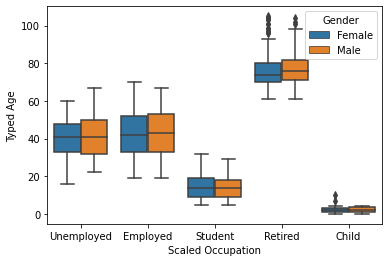

In [738]:
sns.boxplot(data=census_copy, x="Scaled Occupation", y="Typed Age", hue="Gender")

In [ ]:
#### Age distribution of marital status

Number of total records 7773
Number of data entry 5960



Age Range	 Frequency
0-50		3592
15-105		2418
16-50		1205
18-50		473
18-48		84
22-22		1
          Percentage
Single      0.462112
Unknown     0.311077
Married     0.155024
Divorced    0.060852
Widowed     0.010807
            0.000129


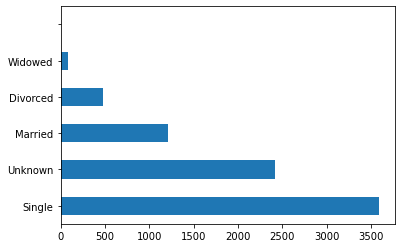

In [787]:
#Marital Status analysis (descriptive)
ms = census_data['Marital Status'].replace(float('nan'), 'Unknown')
ms2 = census_data['Marital Status'].dropna()
print('Number of total records', len(ms))
print('Number of data entry', len(ms2))
#print('Response=', ms.unique())
#print('No =', list(ms.value_counts()))
print()
print()
print()
# Occupation groups
status_groups = []
Married_age_groups = []
Single_age_groups = []
Divorced_age_groups = []
Widowed_age_groups = []
Unknown_age_groups = []
Other_age_groups = []

i = 0
for val in ms:
    if typed_age_data[i] < 15:
        status_groups.append('Single')
        Single_age_groups.append(typed_age_data[i])

    elif val.find('Single') != -1 & typed_age_data[i] > 50:
        status_groups.append('Unknown')
        Unknown_age_groups.append(typed_age_data[i])
    elif val.find('Single') != -1:
        status_groups.append('Single')
        Single_age_groups.append(typed_age_data[i])
    elif val.find('Married') != -1:
            status_groups.append('Married')
            Married_age_groups.append(typed_age_data[i])
    elif val.find('Divorced') != -1:
            status_groups.append('Divorced')
            Divorced_age_groups.append(typed_age_data[i])
    elif val.find('Widowed') != -1:
            status_groups.append('Widowed')
            Widowed_age_groups.append(typed_age_data[i])
    elif val.find('Unknown') != -1:
            status_groups.append('Unknown')
            Unknown_age_groups.append(typed_age_data[i])
    else:
        status_groups.append(val)
        Other_age_groups.append(typed_age_data[i])
    i+=1

age_groups = [
                Single_age_groups,
                Unknown_age_groups,
                Married_age_groups,
                Divorced_age_groups,
                Widowed_age_groups,                
                Other_age_groups]
print('Age Range\t', 'Frequency')
for ag in age_groups:
    print(str(min(ag)) + '-' + str(max(ag)) + '\t\t'+ str(len(ag)))

status_series = pd.DataFrame(data=status_groups)
print(status_series[0].value_counts(normalize=True).to_frame('Percentage'))
status_series[0].value_counts().plot(kind='barh')

Occupation			   Count


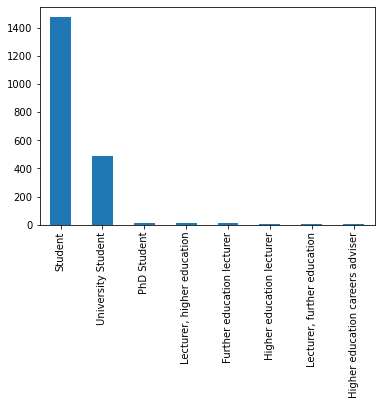

In [848]:
#Commuter analysis
import re
comm = ['university','student', 'lecturer', 'Lecturer', 'University','Student', 'higher', 'Higher']
retired = ['Retired']
j = 0
index_array = []
for i in census_copy['Occupation']:
    checked = re.findall(r"(?=("+'|'.join(comm)+r"))", i)
    checked2 = re.findall(r"(?=("+'|'.join(retired)+r"))", i)
    if len(checked) > 0 and len(checked2) < 1:
        index_array.append(j)
    j+=1

print('Occupation\t\t\t  ', 'Count')
census_copy.loc[index_array, 'Occupation'].value_counts().plot(kind='bar')

Number of total records 7773
Number of data entry 7773
Number of unique responses 8



                 index  Frequency
0                 None       7721
1    Unknown Infection         10
2                Blind         10
3  Physical Disability          8
4             Disabled          7
5                               6
6    Mental Disability          6
7                 Deaf          5


'\nimport seaborn as sns\n\nplt.figure(figsize=(12, 4))\na = sns.violinplot(x= ms, y=typed_age_data, hue=census_data[\'Gender\'], scale="count", split=True)\n'

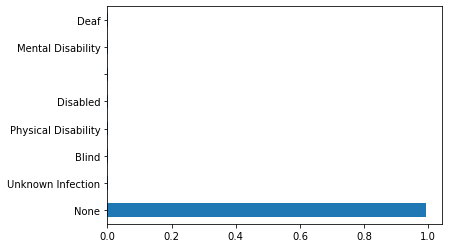

In [853]:
# Infirmity Analysis
ms = census_data['Infirmity'].replace(float('nan'), 'Unknown')
ms2 = census_data['Infirmity'].dropna()
print('Number of total records', len(ms))
print('Number of data entry', len(ms2))
print('Number of unique responses', ms.nunique())
#print('Response=', rel.unique())
#print('No =', list(rel.value_counts()))
print()
print()
print()
#print('Response  |    No')
#print('-------------------')
print(ms.value_counts().to_frame('Frequency').reset_index())
ms.value_counts(normalize=True).plot(kind='barh')
'''
import seaborn as sns

plt.figure(figsize=(12, 4))
a = sns.violinplot(x= ms, y=typed_age_data, hue=census_data['Gender'], scale="count", split=True)
'''

In [553]:
'''
Alternative to plot:

male=[] 
female=[]
for i in range(len(result)):
    if i%2 == 0:
        female.append(result[i])
    else:
        male.append(result[i] * -1)
bins = [str(i)+'-'+str(i+5) for i in range(0,100,5)] 
array=np.array([bins, male, female])
df = pd.DataFrame(data=array, index=['Age', 'Male', 'Female'])

df
bins = [str(i)+'-'+str(i+5) for i in range(100,0,-5)] 
AgeClass = bins# ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

bar_plot = sns.barplot(x=bins, y=df.loc['Male'].to_numpy(), label="Male")

bar_plot = sns.barplot(x=bins, y = df.loc['Female'].to_numpy(), label='Female')
bar_plot.set(xlabel="Population Distribution", ylabel="Age-Group", title = "Population Pyramid")

plt.xticks(bins)
plt.yticks(bins)

plt.legend(frameon = False)

plt.tight_layout()
'''

'\nAlternative to plot:\n\nmale=[] \nfemale=[]\nfor i in range(len(result)):\n    if i%2 == 0:\n        female.append(result[i])\n    else:\n        male.append(result[i] * -1)\nbins = [str(i)+\'-\'+str(i+5) for i in range(0,100,5)] \narray=np.array([bins, male, female])\ndf = pd.DataFrame(data=array, index=[\'Age\', \'Male\', \'Female\'])\n\ndf\nbins = [str(i)+\'-\'+str(i+5) for i in range(100,0,-5)] \nAgeClass = bins# [\'100+\',\'95-99\',\'90-94\',\'85-89\',\'80-84\',\'75-79\',\'70-74\',\'65-69\',\'60-64\',\'55-59\',\'50-54\',\'45-49\',\'40-44\',\'35-39\',\'30-34\',\'25-29\',\'20-24\',\'15-19\',\'10-14\',\'5-9\',\'0-4\']\n\nbar_plot = sns.barplot(x=bins, y=df.loc[\'Male\'].to_numpy(), label="Male")\n\nbar_plot = sns.barplot(x=bins, y = df.loc[\'Female\'].to_numpy(), label=\'Female\')\nbar_plot.set(xlabel="Population Distribution", ylabel="Age-Group", title = "Population Pyramid")\n\nplt.xticks(bins)\nplt.yticks(bins)\n\nplt.legend(frameon = False)\n\nplt.tight_layout()\n'

          0  1  2
Positive  1  5  9
Negative  3  5  7


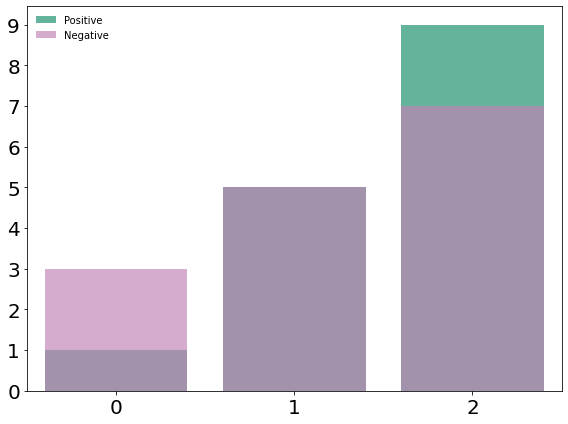

In [545]:
'''
Trying to get label

array = np.array([[1,5,9],[3,5,7]])

df = pd.DataFrame(data=array, index=['Positive', 'Negative'])

f, ax = plt.subplots(figsize=(8, 6))

current_palette = sns.color_palette('colorblind')
sns.barplot(x = np.arange(0,3,1), y = df.loc['Positive'].to_numpy(), color = current_palette[2], alpha = 0.66, label = "Positive")
sns.barplot(x = np.arange(0,3,1), y = df.loc['Negative'].to_numpy(), color = current_palette[4], alpha = 0.66, label = "Negative")

plt.xticks(np.arange(0,3,1), fontsize = 20)
plt.yticks(np.arange(0,10,1), fontsize = 20)

plt.legend(frameon = False)

plt.tight_layout()
'''

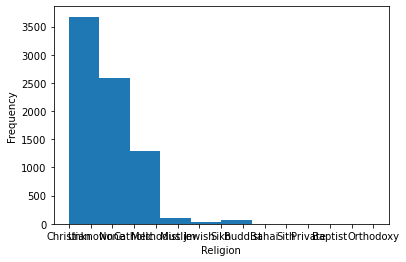

In [493]:
fig.set_figheight(10)
fig.set_figwidth(12)

plt.hist(rel)
plt.ylabel('Frequency')
plt.xlabel('Religion')

plt.show()

Frequency by Age and Religion

In [494]:

cd = census_data.dropna(0)

age = [0 if i == None else i for i in cd['Age']]

relationship = cd['Relationship to Head of House']
marital_status = ['other' if type(i) == float and math.isnan(i) else i for i in cd['Marital Status']]
gender = cd['Gender']
street = cd['Street']
print(len(marital_status))

census_data = census_data.reset_index(drop=True)

print (cd)

5909
      Unnamed: 0 House Number              Street First Name    Surname Age  \
0              0            1   Forgotten Gardens      Laura      White  56   
1              1            1   Forgotten Gardens     Elliot      White  57   
3              3            2   Forgotten Gardens   Michelle       John  44   
5              5            3   Forgotten Gardens      Emily  Henderson  72   
6              6            4   Forgotten Gardens      Harry      Mills  38   
...          ...          ...                 ...        ...        ...  ..   
7765        7765            1       Adams Cottage    Barbara      Singh  43   
7768        7768            1  Fletcher Farmhouse   Beverley     Hudson  30   
7770        7770            1  Fletcher Farmhouse    Stephen   Shepherd  54   
7771        7771            1  Fletcher Farmhouse    William     French  48   
7772        7772            1  Fletcher Farmhouse    Deborah      Yates  34   

     Relationship to Head of House Marital Sta

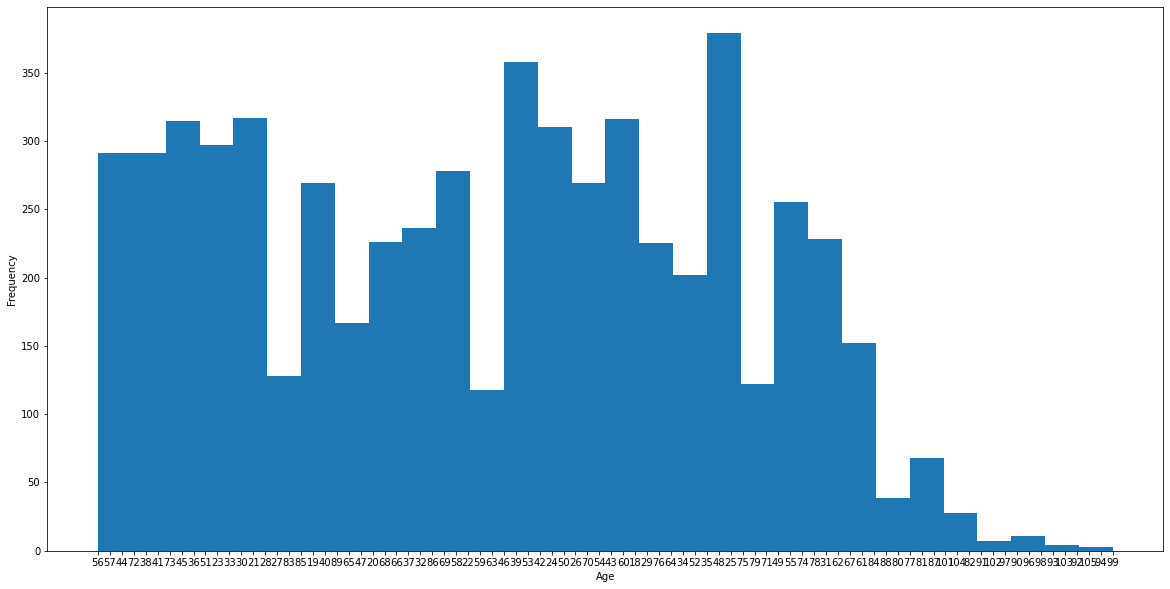

In [495]:
# Plotting a figure of width 10 and height 5
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.hist(age, bins=30)
plt.ylabel('Frequency')
plt.xlabel('Age')

plt.show()

### Other things we could do...
One other thing we could do is compare ages, relationships to head of house, marital status and gender to find possible error data entry. For instance, there could be people below marital ages, males that are wives and vice versa, individuals that are too young or too old to work etc.

I thought there would be people from the same houses, streets with same surnames constituting the same family which could be useful later (e.g. to determine living standards, alongside occupation, unemployment rate or for envisaging the economic growth or declination of the city), as a family is the smallest unit of a society or city for which census data should be collected and analysed. 

I also thought that age, gender and marital status variables could reveal information about birth and death rate, gender issues, population growth, political involvement, etc.

Finally, I also thought that infirmity and religion could play a big part in suggesting hygiene status or other unhealthy practices and social relationships and interactions between residents.

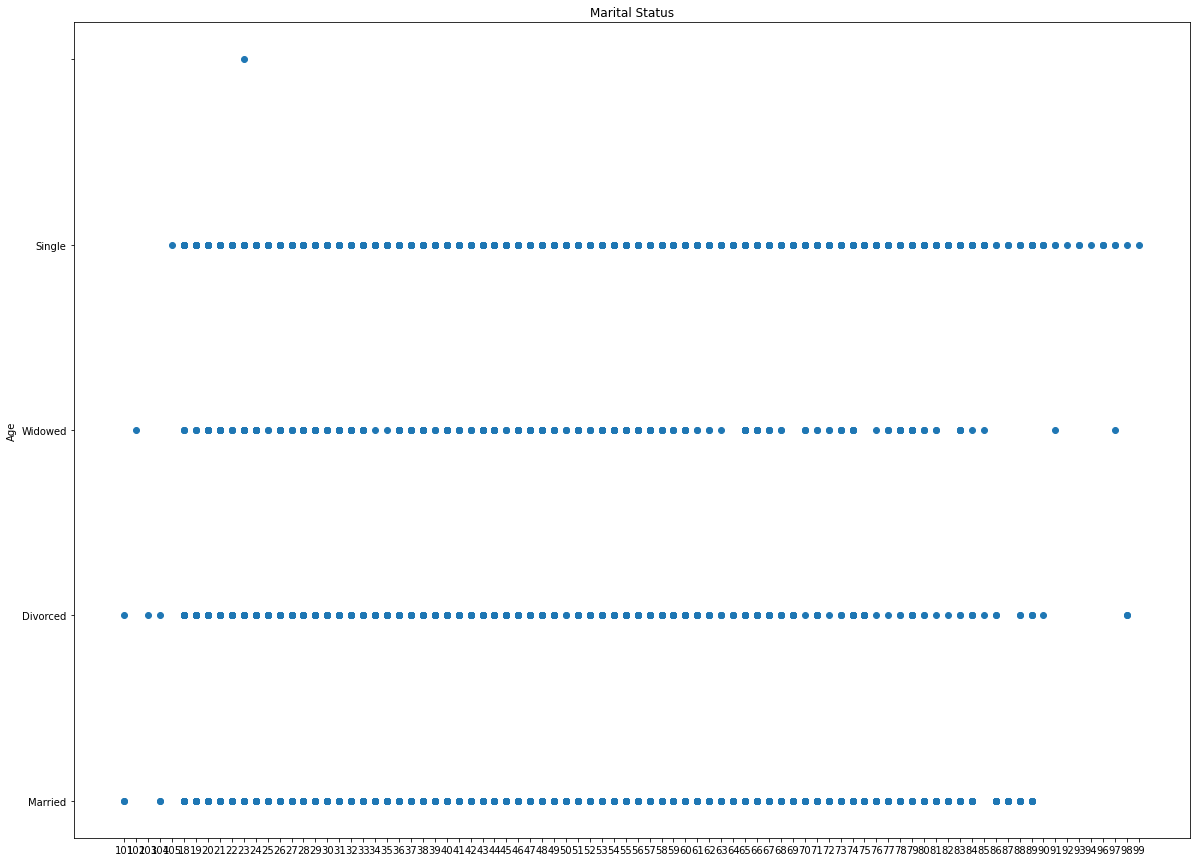

In [496]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
age.sort()

plt.scatter(age, marital_status)

plt.ylabel('Age')
plt.title('Marital Status')

fig.set_figheight(15)
fig.set_figwidth(20)

plt.show()